In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
CountryInfo = pd.read_csv('Assi1 noisy_data (1).csv')
CountryInfo.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


Here We will check the is there any null value or not 

In [ ]:
CountryInfo.isnull().any()

Region            False
Age                True
Income             True
Online Shopper    False
dtype: bool

Here we got null values in Age and Income

In [ ]:
from sklearn.impute import SimpleImputer
dataCopy = CountryInfo.copy()
meanValueImputer = SimpleImputer(strategy='mean')
dataCopy['Age'] = meanValueImputer.fit_transform(dataCopy['Age'].values.reshape(-1,1))
dataCopy['Income'] = meanValueImputer.fit_transform(dataCopy['Income'].values.reshape(-1,1))

In [ ]:
dataCopy.isnull().any()

Region            False
Age               False
Income            False
Online Shopper    False
dtype: bool

Now we made new file in which we do not have any null value


In [ ]:
dataCopy.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.000000,No
1,Brazil,32.0,57600.000000,Yes
2,USA,35.0,64800.000000,No
3,Brazil,43.0,73200.000000,No
4,USA,45.0,76533.333333,Yes


Here we have only two numerical colums now we will check normality on a base of pvalue

Age

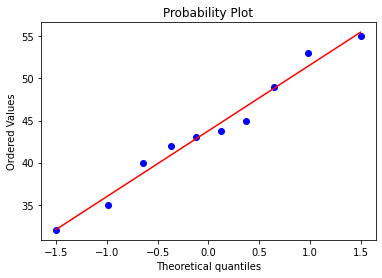

In [ ]:
from scipy import stats
stats.probplot(dataCopy.Age, plot=plt)
plt.show()

In [ ]:
stats.shapiro(dataCopy.Age)

ShapiroResult(statistic=0.9711921811103821, pvalue=0.9016733765602112)

pvalue>0.5 so we can say that Age == Normaly Distributed

italicized text

Income

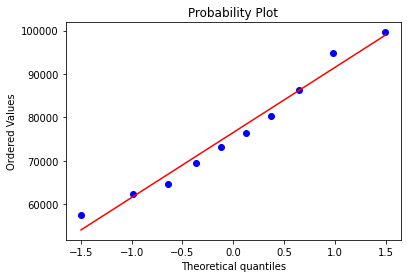

In [ ]:
from scipy import stats
stats.probplot(dataCopy.Income, plot=plt)
plt.show()

In [ ]:
stats.shapiro(dataCopy.Income)

ShapiroResult(statistic=0.9625767469406128, pvalue=0.8148082494735718)

pvalue>0.5 so we can say that Income == Normaly Distributed

so we can say that Age and Income are co-related


Now let's check for categorical variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode the categorical variable "Region"
encoded_region = encoder.fit_transform(dataCopy.Region)

# Encode the categorical variable "Online Shopper"
encoded_shopper = encoder.fit_transform(dataCopy['Online Shopper'])

# Remove the original "Region" and "Online Shopper" columns from the dataset
transformed_data = dataCopy.drop(['Region','Online Shopper'], axis='columns')

# Add the encoded versions of the "Region" and "Online Shopper" columns to the dataset
transformed_data['Region'] = encoded_region
transformed_data['Online Shopper'] = encoded_shopper

transformed_data.head()

,Age,Income,Region,Online Shopper
0,49.0,86400.000000,1,0
1,32.0,57600.000000,0,1
2,35.0,64800.000000,2,0
3,43.0,73200.000000,0,0
4,45.0,76533.333333,2,1


In [ ]:
import numpy as np

def normalize_feature(feature):
    return (feature - np.min(feature)) / (np.max(feature) - np.min(feature))

age_normalized = normalize_feature(transformed_data['Age'])
income_normalized = normalize_feature(transformed_data['Income'])
region_normalized = normalize_feature(transformed_data['Region'])
shopper_normalized = normalize_feature(transformed_data['Online Shopper'])

transformed_data.drop(['Age', 'Income', 'Region', 'Online Shopper'], axis=1, inplace=True)

transformed_data['Age'] = age_normalized
transformed_data['Income'] = income_normalized
transformed_data['Region'] = region_normalized
transformed_data['Online Shopper'] = shopper_normalized

transformed_data.head()

,Age,Income,Region,Online Shopper
0,0.739130,0.685714,0.5,0.0
1,0.000000,0.000000,0.0,1.0
2,0.130435,0.171429,1.0,0.0
3,0.478261,0.371429,0.0,0.0
4,0.565217,0.450794,1.0,1.0


In [ ]:
text = '''The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.

Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural-language system working in restricted "blocks worlds" with restricted vocabularies, and ELIZA, a simulation of a Rogerian psychotherapist, written by Joseph Weizenbaum between 1964 and 1966. Using almost no information about human thought or emotion, ELIZA sometimes provided a startlingly human-like interaction. When the "patient" exceeded the very small knowledge base, ELIZA might provide a generic response, for example, responding to "My head hurts" with "Why do you say your head hurts?".'''

text = text.lower()

Now we will use regexp tokenizer

In [ ]:
import nltk
nltk.download('punkt')

tokens = nltk.tokenize.regexp_tokenize(text, pattern="[\s]+", gaps=True)

print(tokens)

['the', 'history', 'of', 'nlp', 'generally', 'started', 'in', 'the', '1950s,', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods.', 'in', '1950,', 'alan', 'turing', 'published', 'an', 'article', 'titled', '"computing', 'machinery', 'and', 'intelligence"', 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence.', 'the', 'georgetown', 'experiment', 'in', '1954', 'involved', 'fully', 'automatic', 'translation', 'of', 'more', 'than', 'sixty', 'russian', 'sentences', 'into', 'english.', 'the', 'authors', 'claimed', 'that', 'within', 'three', 'or', 'five', 'years,', 'machine', 'translation', 'would', 'be', 'a', 'solved', 'problem.[2]', 'however,', 'real', 'progress', 'was', 'much', 'slower,', 'and', 'after', 'the', 'alpac', 'report', 'in', '1966,', 'which', 'found', 'that', 'ten-year-long', 'research', 'had', 'failed', 'to', 'fulfill', 'the', 'expectations,', 'funding', 'for', 'machine', 'translation', 'was

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#we have to remove stop words

import nltk
nltk.download('stopwords') # Download the stopwords dataset from nltk
from nltk.corpus import stopwords # Import the stopwords dataset

stop_words_list = stopwords.words('english') # Store the english stopwords in a list

# Initialize an empty list to store the filtered words
filtered_words = [] 

# Iterate over each word in the retknText list
for word in tokens: 
    # Check if the word is not in the stop_words_list
    if word.lower() not in stop_words_list: 
        # If it's not, append it to the filtered_words list
        filtered_words.append(word)

# Print the filtered words
print(filtered_words)

['history', 'nlp', 'generally', 'started', '1950s,', 'although', 'work', 'found', 'earlier', 'periods.', '1950,', 'alan', 'turing', 'published', 'article', 'titled', '"computing', 'machinery', 'intelligence"', 'proposed', 'called', 'turing', 'test', 'criterion', 'intelligence.', 'georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'russian', 'sentences', 'english.', 'authors', 'claimed', 'within', 'three', 'five', 'years,', 'machine', 'translation', 'would', 'solved', 'problem.[2]', 'however,', 'real', 'progress', 'much', 'slower,', 'alpac', 'report', '1966,', 'found', 'ten-year-long', 'research', 'failed', 'fulfill', 'expectations,', 'funding', 'machine', 'translation', 'dramatically', 'reduced.', 'little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s,', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed.', 'notably', 'successful', 'nlp', 'systems', 'developed', '1960s', 'shrdlu,', 'natural-language', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Now we will remove all Punctuations
import string

NewText=' '.join(filtered_words)
NewText = NewText.translate(str.maketrans('','',string.punctuation))
print(NewText)

history nlp generally started 1950s although work found earlier periods 1950 alan turing published article titled computing machinery intelligence proposed called turing test criterion intelligence georgetown experiment 1954 involved fully automatic translation sixty russian sentences english authors claimed within three five years machine translation would solved problem2 however real progress much slower alpac report 1966 found tenyearlong research failed fulfill expectations funding machine translation dramatically reduced little research machine translation conducted late 1980s first statistical machine translation systems developed notably successful nlp systems developed 1960s shrdlu naturallanguage system working restricted blocks worlds restricted vocabularies eliza simulation rogerian psychotherapist written joseph weizenbaum 1964 1966 using almost information human thought emotion eliza sometimes provided startlingly humanlike interaction patient exceeded small knowledge base

Here we will start word tokenization

In [ ]:
import nltk
nltk.download('punkt')

WordToken=nltk.word_tokenize(text)

print(WordToken)

['the', 'history', 'of', 'nlp', 'generally', 'started', 'in', 'the', '1950s', ',', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods', '.', 'in', '1950', ',', 'alan', 'turing', 'published', 'an', 'article', 'titled', '``', 'computing', 'machinery', 'and', 'intelligence', "''", 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence', '.', 'the', 'georgetown', 'experiment', 'in', '1954', 'involved', 'fully', 'automatic', 'translation', 'of', 'more', 'than', 'sixty', 'russian', 'sentences', 'into', 'english', '.', 'the', 'authors', 'claimed', 'that', 'within', 'three', 'or', 'five', 'years', ',', 'machine', 'translation', 'would', 'be', 'a', 'solved', 'problem', '.', '[', '2', ']', 'however', ',', 'real', 'progress', 'was', 'much', 'slower', ',', 'and', 'after', 'the', 'alpac', 'report', 'in', '1966', ',', 'which', 'found', 'that', 'ten-year-long', 'research', 'had', 'failed', 'to', 'fulfill', 'the', 'ex

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
nltk.download("stopwords") # Download the corpus of stopwords from nltk
from nltk.corpus import stopwords # Import the stopwords corpus from nltk

stop_word_list = stopwords.words("english") # Store the English stopwords

filtered_words = [] # Initialize an empty list to store the filtered words

for word in WordToken:
    if word.lower() not in stop_word_list:
        filtered_words.append(word)

print(filtered_words)

['history', 'nlp', 'generally', 'started', '1950s', ',', 'although', 'work', 'found', 'earlier', 'periods', '.', '1950', ',', 'alan', 'turing', 'published', 'article', 'titled', '``', 'computing', 'machinery', 'intelligence', "''", 'proposed', 'called', 'turing', 'test', 'criterion', 'intelligence', '.', 'georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'russian', 'sentences', 'english', '.', 'authors', 'claimed', 'within', 'three', 'five', 'years', ',', 'machine', 'translation', 'would', 'solved', 'problem', '.', '[', '2', ']', 'however', ',', 'real', 'progress', 'much', 'slower', ',', 'alpac', 'report', '1966', ',', 'found', 'ten-year-long', 'research', 'failed', 'fulfill', 'expectations', ',', 'funding', 'machine', 'translation', 'dramatically', 'reduced', '.', 'little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', ',', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed', '.', 'notably', 'success

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import string

Finaltext=' '.join(filtered_words)
Finaltext = Finaltext.translate(str.maketrans('','',string.punctuation))
print(Finaltext)

history nlp generally started 1950s  although work found earlier periods  1950  alan turing published article titled  computing machinery intelligence  proposed called turing test criterion intelligence  georgetown experiment 1954 involved fully automatic translation sixty russian sentences english  authors claimed within three five years  machine translation would solved problem   2  however  real progress much slower  alpac report 1966  found tenyearlong research failed fulfill expectations  funding machine translation dramatically reduced  little research machine translation conducted late 1980s  first statistical machine translation systems developed  notably successful nlp systems developed 1960s shrdlu  naturallanguage system working restricted  blocks worlds  restricted vocabularies  eliza  simulation rogerian psychotherapist  written joseph weizenbaum 1964 1966 using almost information human thought emotion  eliza sometimes provided startlingly humanlike interaction   patient  

In [ ]:
#Find all years

import re

Find_years = re.findall('(\d{4})', text)
print(Find_years)

['1950', '1950', '1954', '1966', '1980', '1960', '1964', '1966']


Diffrence between Regexp and word tokenization

1. The number of tokens in the list generated by the word tokenizer is larger compared to the list generated by the regex tokenizer.

2. The regex tokenizer has the capability to eliminate multiple punctuation symbols, such as "," and "'," whereas the word tokenizer does not eliminate any of these punctuations. As a result, tokens like "1950" and "," can be seen in the token list produced by the word tokenizer.

3. The choice between these two methods can be made based on the specific requirements of the use case.

In [ ]:
#Q3


Data = pd.read_csv('melb_data.csv')
Data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
Data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
print(round(Data['BuildingArea'].mean(),1))
print(round(Data['YearBuilt'].mean()))

152.0
1965


In [ ]:
Data['BuildingArea']=Data['BuildingArea'].replace(np.nan, round(Data['BuildingArea'].mean(),1))
Data['YearBuilt']=Data['YearBuilt'].replace(np.nan, round(Data['YearBuilt'].mean()))

print(Data['CouncilArea'].unique())
print(Data['CouncilArea'].mode())

['Yarra' 'Moonee Valley' 'Port Phillip' 'Darebin' 'Hobsons Bay'
 'Stonnington' 'Boroondara' 'Monash' 'Glen Eira' 'Whitehorse'
 'Maribyrnong' 'Bayside' 'Moreland' 'Manningham' 'Banyule' 'Melbourne'
 'Kingston' 'Brimbank' 'Hume' nan 'Knox' 'Maroondah' 'Casey' 'Melton'
 'Greater Dandenong' 'Nillumbik' 'Whittlesea' 'Frankston' 'Macedon Ranges'
 'Yarra Ranges' 'Wyndham' 'Cardinia' 'Unavailable' 'Moorabool']
0    Moreland
dtype: object


Given that all values in the "Council Area" column are unique and occur only once, and that this column represents just 10% of the total data, it is feasible to eliminate all missing values in the remaining data.

In [ ]:
print('Before eliminating entries.', Data.shape)
Data.dropna(axis=0, inplace=True)
print('After eliminating entries.', Data.shape)

Before eliminating entries. (13580, 21)
After eliminating entries. (12211, 21)


In [ ]:
Data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd

# Removing certain columns from the melbData DataFrame
columns_to_drop = ['Date', 'Suburb', 'Address', 'Method', 'SellerG', 'CouncilArea',
'Regionname', 'Lattitude', 'Longtitude', 'Bedroom2']
Data.drop(columns_to_drop, axis=1, inplace=True)

# Encoding categorical variable 'Type'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(Data['Type'])

# Removing the original Type column and adding the encoded labels
Data.drop('Type', axis=1, inplace=True)
Data['Type'] = encoded_labels

# Checking the shape of the modified DataFrame
print("The shape of the DataFrame after encoding and removing certain columns: ", Data.shape)


The shape of the DataFrame after encoding and removing certain columns:  (12211, 11)


In [ ]:
#Coorelation

print(Data.corr())

                  Rooms     Price  Distance  Postcode  Bathroom       Car  \
Rooms          1.000000  0.510522  0.291880  0.041216  0.590537  0.410980   
Price          0.510522  1.000000 -0.146137  0.118202  0.473933  0.248628   
Distance       0.291880 -0.146137  1.000000  0.407168  0.124433  0.269406   
Postcode       0.041216  0.118202  0.407168  1.000000  0.108269  0.045136   
Bathroom       0.590537  0.473933  0.124433  0.108269  1.000000  0.329498   
Car            0.410980  0.248628  0.269406  0.045136  0.329498  1.000000   
Landsize       0.022871  0.038536  0.016920  0.021272  0.035098  0.023335   
BuildingArea   0.305009  0.279231  0.084322  0.039707  0.273182  0.162083   
YearBuilt     -0.068144 -0.261342  0.181122  0.019638  0.114564  0.074937   
Propertycount -0.090703 -0.037167 -0.078204  0.069350 -0.051937 -0.029895   
Type          -0.558139 -0.430345 -0.228071  0.044191 -0.234389 -0.267733   

               Landsize  BuildingArea  YearBuilt  Propertycount      Type  

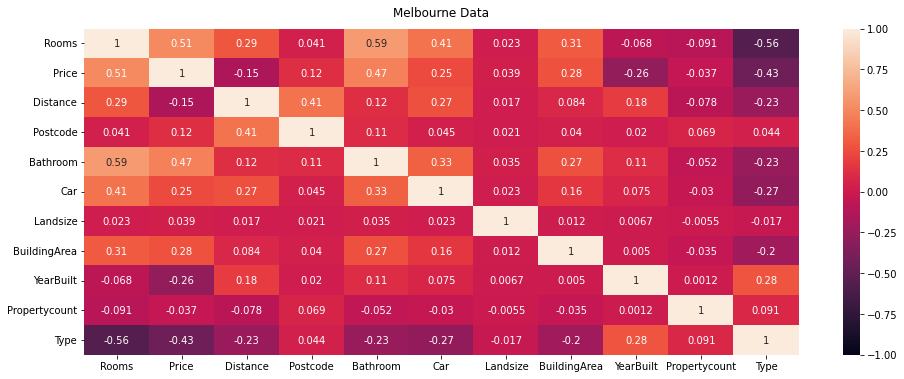

In [ ]:
import seaborn as sns

plt.figure(figsize=(16, 6))
Heatmap_display = sns.heatmap(Data.corr(), vmin=-1, vmax=1, annot=True)
Heatmap_display.set_title('Melbourne Data', fontdict={'fontsize':12}, pad=12);

Chi Squre test


In [ ]:
from sklearn.feature_selection import chi2
Ft = Data.drop('Price', axis=1)
Lb = Data['Price']
CS_count = chi2(Ft,Lb)
CS_count

(array([1.77858408e+03, 7.68334218e+03, 5.66404211e+03, 1.43683547e+03,
        1.67124900e+03, 4.28213558e+07, 1.86732479e+05, 1.36044929e+03,
        5.27025604e+06, 6.97133470e+03]),
 array([0.99999993, 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ]))

In [ ]:
PValue = pd.Series(CS_count[1],index = Ft.columns)

PValue.sort_values(ascending = False , inplace = True)

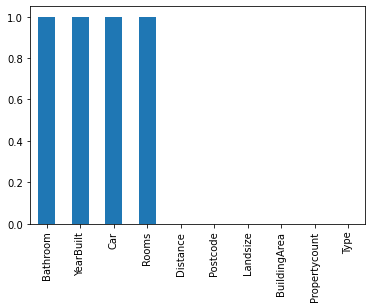

In [ ]:
PValue.plot.bar()

In [ ]:
#Mutual-Information

#Using SelectKBest from scikit-learn's feature_selection module to perform feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif

#Splitting the data into features and labels
features = Data.drop('Price', axis=1)
labels = Data['Price']

#Applying the SelectKBest method using mutual information as the scoring function
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selected_features = selector.fit_transform(features, labels)


Feature 0: 0.473845796116108
Feature 1: 0.07595356677427567
Feature 2: 0.13466000650185883
Feature 3: 0.8691253164149808
Feature 4: 0.5911447795668936
Feature 5: 0.14014497117853697
Feature 6: 0.3496540458736508
Feature 7: 0.22103121940922588
Feature 8: 0.08211448751303951
Feature 9: 0.40330251927358507


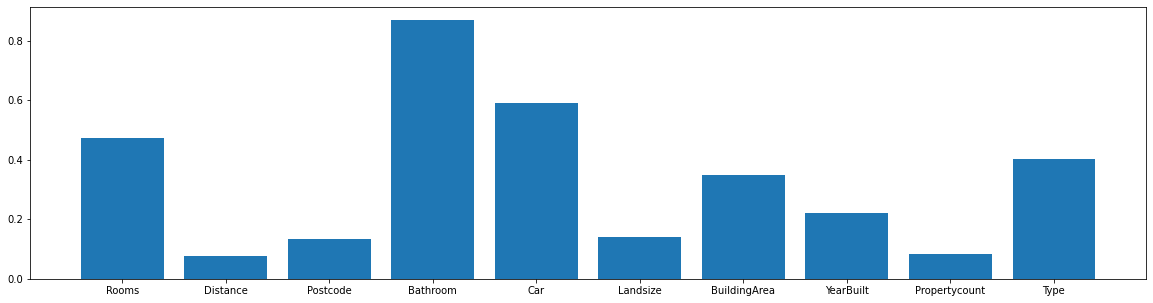

In [ ]:
#Using a loop to print out each feature score obtained from the SelectKBest algorithm
for i, score in enumerate(selector.scores_):
  print(f"Feature {i}: {score}")

#Creating a bar graph to visualize the feature scores
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.bar(features.columns, selector.scores_)
plt.show()

Random Forest feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Ft = Data.drop('Price', axis=1)
Lb = Data['Price']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Ft, Lb, test_size=0.25, random_state=12)

#Initializing the Random Forest Classifier

RandomForest = RandomForestClassifier(n_estimators=10)
#Fitting the model to the training data

RandomForest.fit(X_train, y_train)

RandomForest.feature_importances_

array([0.05102263, 0.12541508, 0.10708521, 0.03489458, 0.07506648,
       0.22082313, 0.13125385, 0.12698261, 0.1118269 , 0.01562954])

Text(0.5, 0, 'Importance of Features in Random Forest Model')

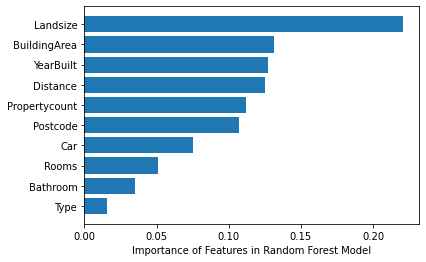

In [ ]:
#Creating a bar plot to visualize the feature importances generated by the Random Forest Model
SortedIndex = np.argsort(RandomForest.feature_importances_)
plt.barh(Ft.columns[SortedIndex], RandomForest.feature_importances_[SortedIndex])
plt.xlabel("Importance of Features in Random Forest Model")

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

corr_matrix = Data.corr()

sorted_corr = corr_matrix['Price'].abs().sort_values(ascending=False)

# Printing the sorted correlation values
print(sorted_corr)


Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
YearBuilt        0.323617
Car              0.238979
Lattitude        0.212934
Longtitude       0.203656
Distance         0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount    0.042153
Landsize         0.037507
Name: Price, dtype: float64


From above all thechniques here are some best features and we have to create feature iomportance bar graph

- Rooms
- Bedroom1
- Bedroom2
- Proparty COunt
- Building Area
- LandSize
- Bathroom
- Area
- Car
- Distance

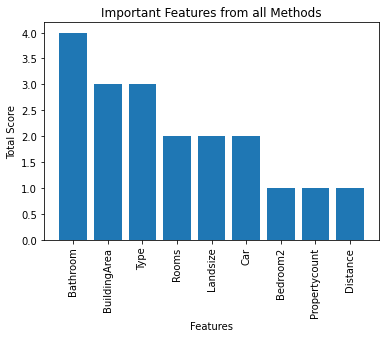

In [83]:
import matplotlib.pyplot as plt

# List of selected features from each method
corr = ['Rooms','Bedroom2','Bathroom','Landsize','Propertycount']
chi2_features = ['Rooms','Bathroom','Car','BuildingArea','Type']
mutual_info_features = ['Bathroom','Car','Distance','BuildingArea','Type']
rf_features = ['Bathroom','Landsize','BuildingArea','Type']

# Create a dictionary to store the scores for each feature
scores = {}

# Loop through each feature and add the scores from each method to the dictionary
for feature in corr:
  scores[feature] = scores.get(feature, 0) + 1
for feature in chi2_features:
  scores[feature] = scores.get(feature, 0) + 1
for feature in mutual_info_features:
  scores[feature] = scores.get(feature, 0) + 1
for feature in rf_features:
  scores[feature] = scores.get(feature, 0) + 1

# Sort the features based on the total scores
sorted_features = sorted(scores, key=scores.get, reverse=True)

# Create a bar plot of the sorted features and their scores
plt.bar(sorted_features, [scores[feature] for feature in sorted_features])
plt.xlabel("Features")
plt.ylabel("Total Score")
plt.title("Important Features from all Methods")
plt.xticks(rotation=90)
plt.show()


Here From the bar graph Bathroom, Building area are the best importance features and distance and proparty type are not to much affecting the price 

so according to all four techniques Mutual-Information performed very vell where as random forest is not so good

Conclusion:
feature selection techniques depend on a data type we get but in this data Mutual information is the best one but Random forest is not so good